<a href="https://colab.research.google.com/github/makxxic/NOTEBOOKS/blob/main/Stage1Task2Question2WK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Import Libraries**
This cell imports all the necessary Python libraries required for data manipulation, numerical operations, plotting, and machine learning.
-   `kagglehub`: For downloading datasets from Kaggle.
-   `pandas` (as `pd`): For data manipulation and analysis, especially with DataFrames.
-   `os`: For interacting with the operating system, like listing directory contents.
-   `numpy` (as `np`): For numerical operations, especially with arrays.
-   `matplotlib.pyplot` (as `plt`): For creating static, interactive, and animated visualizations.

In [29]:
import kagglehub as kh # Import kagglehub for downloading datasets
import pandas as pd # Import pandas for data manipulation and analysis
import os # Import os for interacting with the operating system
import numpy as np # Import numpy for numerical operations
import matplotlib.pyplot as plt # Import matplotlib.pyplot for plotting

### **2. Download Dataset**
This cell uses `kagglehub` to download a specific dataset. It then prints the path where the dataset files are located and lists the contents of that directory to confirm the downloaded files.

In [30]:
# Download the latest version of the specified dataset from Kaggle Hub
path = kh.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")

print("Path to dataset files:", path) # Print the local path where the dataset is stored
os.listdir(path) # List the files available in the downloaded dataset directory

Using Colab cache for faster access to the 'multiple-linear-regression-dataset' dataset.
Path to dataset files: /kaggle/input/multiple-linear-regression-dataset


['multiple_linear_regression_dataset.csv']

### **3. Load Data into DataFrame**
This cell reads the downloaded CSV file into a pandas DataFrame. The `df.head()` method is then used to display the first few rows of the DataFrame, providing a quick overview of the data structure and content.

In [31]:
df = pd.read_csv(path +'/multiple_linear_regression_dataset.csv') # Read the CSV file into a pandas DataFrame
df.head() # Display the first 5 rows of the DataFrame

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


### **4. Prepare Features and Target Variables**
This cell extracts the 'age' and 'experience' columns as independent variables (`X1` and `X2` respectively) and the 'income' column as the dependent variable (`Y`). It also calculates the number of samples (`n`) in the dataset, which is useful for gradient descent calculations.

In [32]:
X1 = df['age'].values # Extract 'age' column as the first independent variable
X2 = df['experience'].values # Extract 'experience' column as the second independent variable
Y = df['income'].values # Extract 'income' column as the dependent variable
n = len(Y) # Get the number of samples in the dataset

### **5. Define Model Functions**
This cell defines three essential functions for multiple linear regression using gradient descent:
-   `predict_multi`: Calculates the predicted `Y` values based on `X1`, `X2`, and the current parameters (`m1`, `m2`, `c`).
-   `mse`: Computes the Mean Squared Error (MSE) between the true and predicted values, serving as the cost function.
-   `gradient_descent_multi`: Implements the gradient descent algorithm to iteratively update the parameters (`m1`, `m2`, `c`) to minimize the MSE. It prints the MSE and parameter values at each epoch.

In [33]:
def predict_multi(X1, X2, m1, m2, c): # Function to predict Y values
    return m1*X1 + m2*X2 + c # Linear equation: Y = m1*X1 + m2*X2 + c

def mse(Y_true, Y_pred): # Function to calculate Mean Squared Error (MSE)
    return np.mean((Y_true - Y_pred)**2) # MSE formula

def gradient_descent_multi(X1, X2, Y, m1, m2, c, learning_rate, epochs): # Gradient Descent function
    n = len(Y) # Number of data points
    costs = [] # List to store MSE values at each epoch

    for epoch in range(epochs): # Loop for a specified number of epochs
        Y_pred = predict_multi(X1, X2, m1, m2, c) # Make predictions with current parameters
        cost = mse(Y, Y_pred) # Calculate the current MSE
        costs.append(cost) # Store the cost

        # Compute gradients for m1, m2, and c
        dm1 = (-2/n) * np.sum(X1 * (Y - Y_pred)) # Gradient for m1
        dm2 = (-2/n) * np.sum(X2 * (Y - Y_pred)) # Gradient for m2
        dc = (-2/n) * np.sum(Y - Y_pred) # Gradient for c (intercept)

        # Update parameters using the learning rate
        m1 -= learning_rate * dm1 # Update m1
        m2 -= learning_rate * dm2 # Update m2
        c -= learning_rate * dc # Update c

        print(f"Epoch {epoch+1}: MSE={cost:.4f}, m1={m1:.4f}, m2={m2:.4f}, c={c:.4f}") # Print progress

    return m1, m2, c, costs # Return final parameters and cost history

### **6. Run Gradient Descent**
This cell initializes the model parameters (`m1`, `m2`, `c`), sets the `learning_rate` and number of `epochs`. It then calls the `gradient_descent_multi` function to train the model and stores the final parameters and the history of costs.

In [34]:
# Initialize parameters (weights and bias) to zero
m1, m2, c = 0.0, 0.0, 0.0
learning_rate = 0.0001 # Set the learning rate for gradient descent
epochs = 1000 # Set the number of training epochs

# Run the gradient descent algorithm
m1_final, m2_final, c_final, costs = gradient_descent_multi(X1, X2, Y, m1, m2, c, learning_rate, epochs)

Epoch 1: MSE=1727049635.0000, m1=331.5904, m2=57.0214, c=8.1471
Epoch 2: MSE=788319092.4588, m1=549.4417, m2=95.5041, c=13.5924
Epoch 3: MSE=382471481.8526, m1=692.5118, m2=121.7959, c=17.2612
Epoch 4: MSE=206980796.1703, m1=786.4149, m2=140.0703, c=19.7622
Epoch 5: MSE=131069909.2056, m1=847.9918, m2=153.0712, c=21.4954
Epoch 6: MSE=98205972.5679, m1=888.3152, m2=162.6029, c=22.7238
Epoch 7: MSE=83950744.6138, m1=914.6651, m2=169.8514, c=23.6204
Epoch 8: MSE=77739965.8131, m1=931.8279, m2=175.5969, c=24.2989
Epoch 9: MSE=75006875.8809, m1=942.9509, m2=180.3519, c=24.8340
Epoch 10: MSE=73777336.9625, m1=950.1029, m2=184.4537, c=25.2749
Epoch 11: MSE=73197960.1697, m1=954.6446, m2=188.1240, c=25.6539
Epoch 12: MSE=72899838.3633, m1=957.4702, m2=191.5084, c=25.9923
Epoch 13: MSE=72723498.0733, m1=959.1680, m2=194.7030, c=26.3040
Epoch 14: MSE=72600000.6383, m1=960.1246, m2=197.7705, c=26.5982
Epoch 15: MSE=72499544.1420, m1=960.5941, m2=200.7525, c=26.8809
Epoch 16: MSE=72409244.8565, m1

### **7. Visualize Cost Function Progress**
This cell plots the Mean Squared Error (MSE) over the training epochs. This visualization helps to understand how the model's error decreased during training, indicating convergence if the curve flattens out.

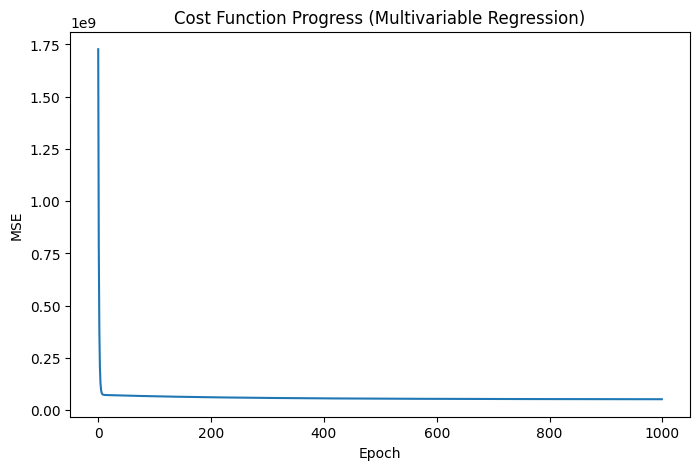

In [35]:
plt.figure(figsize=(8,5)) # Create a new figure with a specified size
plt.plot(range(len(costs)), costs) # Plot the cost (MSE) against the number of epochs
plt.title("Cost Function Progress (Multivariable Regression)") # Set the title of the plot
plt.xlabel("Epoch") # Set the label for the x-axis
plt.ylabel("MSE") # Set the label for the y-axis
plt.show() # Display the plot

### **8. Display Final Parameters**
This cell prints the final optimized values for `m1`, `m2` (coefficients for age and experience), and `c` (intercept) after the gradient descent training is complete. These are the parameters that define the best-fit multiple linear regression model for the given data.

In [36]:
print(f"Final parameters:\nm1 = {m1_final:.4f}\nm2 = {m2_final:.4f}\nc = {c_final:.4f}") # Print the final calculated values of m1, m2, and c

Final parameters:
m1 = 764.7541
m2 = 1371.0343
c = 321.7364
